# SP2273 Application Challenge
### Rao Zhehong, Wong Pin Han, Marcus Tay Yu Hao, Poh How Ee, Dylan

In this notebook, we attempt to estimate the age of the universe using the Galaxy And Mass Assembly (GAMA) Survey Data Release 4.

Hubble's Law states that galaxies recede from us with velocities proportional to their distance from us: $v = H_0 d$, where $H_0$ is the Hubble constant. By fitting this linear relationship to observational data, we can estimate $H_0$ and subsequently calculate the approximate age of the universe using $t_0 \approx \frac{1}{H_0}$. 0.956 is used instead of 1 to account for contribution from dark matter and dark energy.

## Task 1: Importing Data

We use the following packages:
- **NumPy**: Array operations on loaded data and numerical computations
- **Matplotlib**: Data visualization
- **SciPy**: Curve fitting for linear regression
- **Astropy**: Physical constants and unit conversions

In [1]:
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from astropy import constants, units

# Make sure data file is in same directory as notebook, change file name below if necessary
data_file = "GAMA_Survey_nearby.csv"

try:
# reads the header of our data file, strips whitespaces, and outputs as a list
  with open(data_file, 'r') as file:
    header = file.readline().strip().split(',')
    print(f"{header}")
# Load data file as an array, skipping header row as arrays can only have 1 data type
  data = np.loadtxt(data_file, skiprows = 1, delimiter= ",")
  print(data)
except FileNotFoundError:
  print(f"Error: The file '{data_file}' was not found.")
except Exception as e:
  print(f"An error occurred: {e}")

['CATAID', 'RA', 'DEC', 'NQ', 'Z_TONRY', 'DM_70_25_75']
[[ 6.7290000e+03  1.7370055e+02  7.7608000e-01  5.0000000e+00
   5.1504000e-02  3.6802900e+01]
 [ 6.7680000e+03  1.7385337e+02  6.2975000e-01  5.0000000e+00
   7.6043900e-02  3.7688600e+01]
 [ 6.8220000e+03  1.7415365e+02  8.1688000e-01  5.0000000e+00
   4.2293700e-03  3.1296100e+01]
 ...
 [ 4.3313580e+06  1.3013719e+02 -8.0280000e-02  5.0000000e+00
   1.3986700e-03  2.8889700e+01]
 [ 4.3356330e+06  1.3354893e+02 -1.1025000e-01  5.0000000e+00
   1.0752500e-03  2.8318200e+01]
 [ 4.3359500e+06  1.3378617e+02 -7.4160000e-02  5.0000000e+00
   1.0726800e-03  2.8313000e+01]]


## Task 2: Check your Data

To use the non-relativistic Doppler formula $v \approx cz$, redshift values must satisfy $z \ll 1$. We verify this by examining the range and distribution of our redshift values.

In [2]:
# Subsetting array to get redshift data from column 5: Z_TONRY
redshift = data[:,4]

# calculate min, max
redshift_min = np.min(redshift)
redshift_max = np.max(redshift)
print(f"The range of redshift values are {redshift_min:6f} to {redshift_max:6f}")

The range of redshift values are 0.001001 to 0.099988


In [3]:
# calculate median
redshift_median = np.median(redshift)
print(f"The median redshift value is {redshift_median:6f}")

The median redshift value is 0.068046


Our redshift values are all much smaller than 1, so the simple relationship $v=cz$ holds.

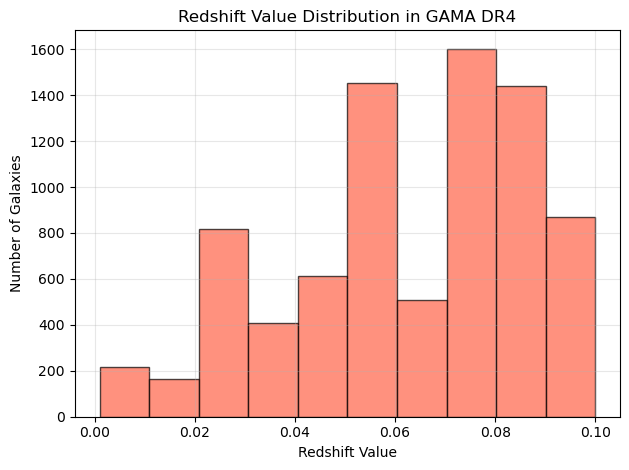

In [4]:
# plotting histogram with 10 bins
plt.hist(bins = 10, x = redshift,edgecolor="black",alpha=0.7,color="tomato")
plt.xlabel("Redshift Value")
plt.ylabel("Number of Galaxies")
plt.title("Redshift Value Distribution in GAMA DR4")
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()

## Task 3: Convert to Recession Velocities

To convert redshift values ($z$) to recessional velocity ($v$), we use the non-relativistic Doppler approximation
$v = cz$,
where $c$ is the speed of light.

To convert distance modulus ($m-M$) to distance in parsecs ($d$), we use $d = 10^{\frac{m-M + 5}{5}}$.

We have to check:
- Velocities should be much lower than $c$ to fulfil the non-relativistic Doppler approximation
- Distances should not exceed ~1000 Mpc for nearby galaxies

In [5]:
# Using non-relativistic approximation: v ≈ cz to convert redshift to recessional velocity
recession_velocity = (redshift * constants.c).to(units.km / units.s)
print(f'Our recessional velocities are {recession_velocity}')

# calculate stats
print(f"They range from {np.min(recession_velocity):.2f} to {np.max(recession_velocity):.2f} and have a median of {np.median(recession_velocity):.2f}")

Our recessional velocities are [15440.51075683 22797.38769691  1267.93322809 ...   419.31071723
   322.35184046   321.58137385] km / s
They range from 300.13 km / s to 29975.71 km / s and have a median of 20399.59 km / s


The maximum velocity (29975.71km/s) is 10% of $c$.

In [6]:
# Subsetting array to get distance modulus data from column 6: DM_70_25_75
distance_modulus = data[:,5]

# Convert distance modulus to physical distance in pc using d = 10^((m-M+5)/5)
distance = 10**((distance_modulus + 5)/5) * units.pc
distance_mpc = distance.to(units.Mpc)
print(f'Our distances are {distance}')

# calculate stats
print(f"They range from {np.min(distance_mpc):.2f} to {np.max(distance_mpc):.2f} and have a median of {np.median(distance_mpc):.2f}")

Our distances are [2.29392915e+08 3.44921289e+08 1.81643558e+07 ... 5.99708218e+06
 4.60935333e+06 4.59832857e+06] pc
They range from 4.29 Mpc to 461.59 Mpc and have a median of 306.99 Mpc


All distances are less than 1000 Mpc.

## Task 4: Plot Stuff

We plot our actual values of recessional velocity against distance.

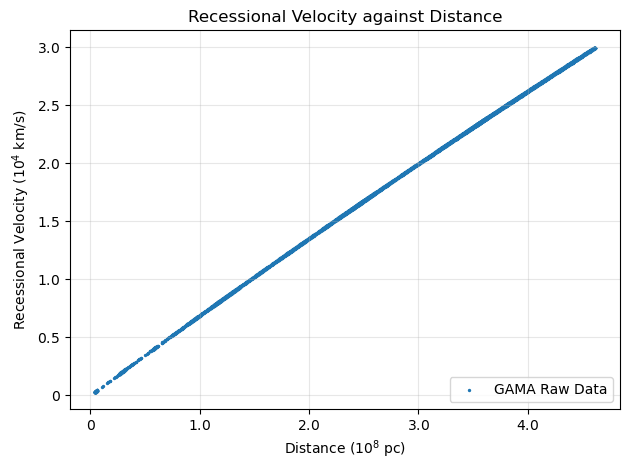

In [7]:
# scatter plotting our actual data
plt.scatter(x = distance, y = recession_velocity, s = 2, label = "GAMA Raw Data")
# making our graph look nice
plt.xlabel("Distance ($10^8$ pc)")
plt.ylabel("Recessional Velocity ($10^4$ km/s)")
plt.yticks([0, 5000, 10000, 15000, 20000, 25000, 30000], ["0", "$0.5$", "$1.0$", "$1.5$", "$2.0$", "$2.5$", "$3.0$"])
plt.xticks([0, 1*10**8, 2*10**8, 3*10**8, 4*10**8], ["0", "$1.0$", "$2.0$", "$3.0$", "$4.0$"])
plt.legend(loc = "lower right")
plt.title("Recessional Velocity against Distance")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Task 5: Linear Regression

We use linear regression to calculate the hubble constant $H_0$ from the slope, based on Hubble's Law $v = H_0d$. There is no intercept as there will be no recessional velocity at a distance of 0.

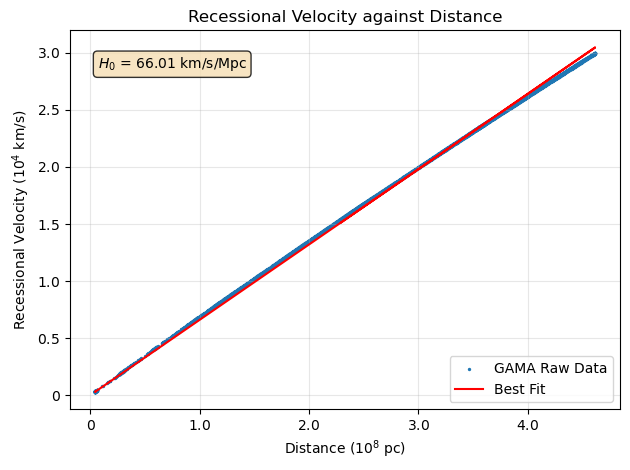

In [8]:
# Defining the objective function v=H_0*d and obtaining best fit parameters based on actual data
def hubble_equation(d, H_0):
    return d * H_0
H_0_calc, _ = curve_fit(hubble_equation, distance, recession_velocity)
# H_0_calc is the calculated value of H_0 in km/s/pc, d will be the distance to galaxies in pc

# plotting scatterplot of actual data and best fit line
plt.scatter(x = distance, y = recession_velocity, s = 2, label = "GAMA Raw Data")
plt.plot(distance, hubble_equation(distance, H_0 = H_0_calc), color = "red", label = "Best Fit")
# making our graph look nice
plt.xlabel("Distance ($10^8$ pc)")
plt.ylabel("Recessional Velocity ($10^4$ km/s)")
plt.yticks([0, 5000, 10000, 15000, 20000, 25000, 30000], ["0", "$0.5$", "$1.0$", "$1.5$", "$2.0$", "$2.5$", "$3.0$"])
plt.xticks([0, 1*10**8, 2*10**8, 3*10**8, 4*10**8], ["0", "$1.0$", "$2.0$", "$3.0$", "$4.0$"])
plt.legend(loc = "lower right")
# transform is to specify the axis
plt.text(0.05,0.90,f'$H_{0}$ = {H_0_calc[0]*1000000:.2f} km/s/Mpc',transform=plt.gca().transAxes,bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
plt.title("Recessional Velocity against Distance")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Task 6: Age of the Universe

We use $t \approx \frac{0.956}{H_0}$ to determine the age of the universe. The factor 0.956 accounts for contributions from dark matter and dark energy.

In [9]:
# reducing the units to 1/s
H_0 = (H_0_calc * units.km / units.s / units.pc).decompose()
# using the formula t = 0.956 / H_0 and converting to Gyr (billions of years)
t_universe = (0.956 / H_0).to(units.Gyr)
# using .value to access value stripped of units
print(f"The age of the universe is {t_universe[0].value:.2f} billion years")

The age of the universe is 14.16 billion years


The Planck 2018 mission results (2020) measured the age of the universe as 13.787 billion years. We use $\text{Deviation} = \frac{|t_{\text{estimated}} - t_{\text{Planck}}|}{t_{\text{Planck}}} \times 100\%$.

In [10]:
percentage_deviation = (t_universe - 13.787 * units.Gyr)/(13.787 * units.Gyr) * 100
print(f"The difference between our results and the Planck results as a percentage deviation of the true value is {percentage_deviation[0]:.2f}%")

The difference between our results and the Planck results as a percentage deviation of the true value is 2.71%


The deviation between results could be attributed to
1. Different estimates of contribution by dark matter and dark energy
1. Usage of a different set of data